In [1]:
import os
import pandas as pd
import lightgbm as lgb

ModuleNotFoundError: No module named 'lightgbm'

In [2]:
from rcv_distribution import *
from MDS_analysis import *
from consistency import *
import os

c:\Users\mahsh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\Users\mahsh\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\mahsh\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [4]:
directory = "dataverse_files"
filename = "Maine_11062018_CongressionalDistrict2.csv"
csv = os.path.join(directory, filename)
ballots, candidates = parse_election_data(csv)

# Perform the RCV analysis
test = perform_rcv_analysis(ballots, candidates, n_init = 100, max_itr = 1000, n_runs=1000, metric=False)
mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names = test

# Print the normalized distances between candidates and plot the MDS analysis
normalized_distances_original = get_distances_normalized(most_common_order, mds_1d_coordinates, candidate_names)

consistent_ballots, gamma = get_permissive_gamma(ballots, normalized_distances_original)



c:\Users\mahsh\Documents\GitHub\bugs-in-democracy\cleaned files\MDS_analysis.py:162: RuntimeWarning: divide by zero encountered in divide
  distance = 1 / np.sqrt(freq_upper_triangle)


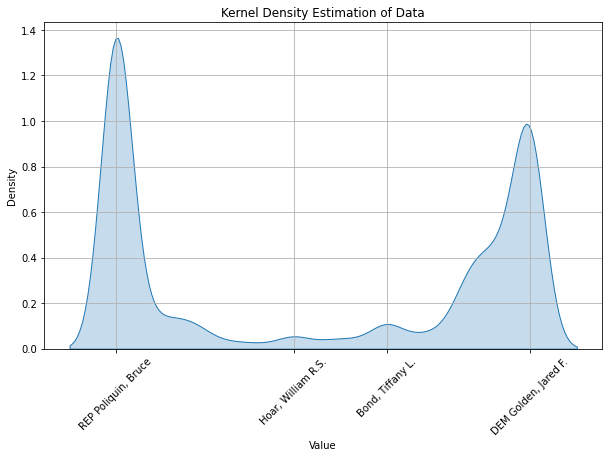

In [6]:
plot_KDE(ballots, normalized_distances_original, filename=None, ignore=False, save=False)

C:\Users\mahsh\AppData\Local\Temp\ipykernel_11732\2853735036.py:17: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  distributed_points = np.array(distributed_points, dtype=float)


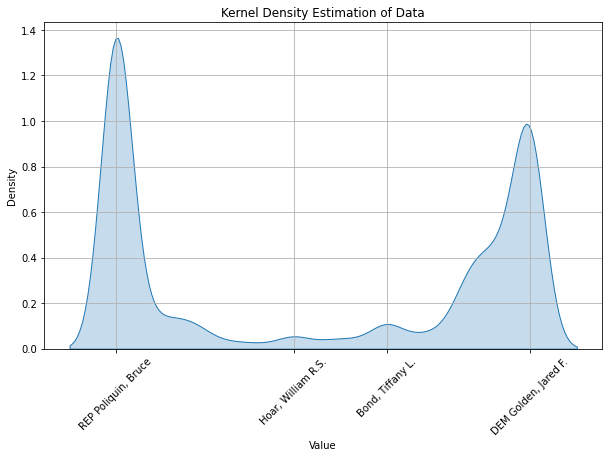

In [5]:
normalized_distances = normalized_distances_original
distributed_points = []
for b in ballots:
    if len(b) > 0:
        b_num = ballot_to_num(b, normalized_distances)
        if len(b) > 1:    
            success, interval = solve_lp(b_num, len(normalized_distances))
            if success:
                points = distribute_points(interval, ballots[b])
                distributed_points.extend(points)
        else:
            success = True
            interval = (b_num, b_num)
            points = distribute_points(interval, ballots[b])
            distributed_points.extend(points)
    
distributed_points = np.array(distributed_points, dtype=float)
normalized_points = []
normalized_names = []
for name in normalized_distances:
    normalized_names.append(name)
    normalized_points.append(normalized_distances[name])
plt.figure(figsize=(10, 6))
sns.kdeplot(distributed_points, fill=True)
plt.title('Kernel Density Estimation of Data')
plt.xticks(normalized_points, normalized_names, rotation=45)
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)

In [ ]:

# Function to load and preprocess data from CSV files
def load_and_preprocess_data(directory):
    feature_list = []
    ranking_list = []
    for file_name in os.listdir(directory):
        if file_name.endswith('.csv'):
            file_path = os.path.join(directory, file_name)
            data = pd.read_csv(file_path)
            features = data[['#candidates', 'type', 'level']].copy()
            features['num_voters'] = len(data)
            rankings = data['rankings']
            feature_list.append(features)
            ranking_list.append(rankings)
    # Combine all features and rankings into a single DataFrame
    combined_features = pd.concat(feature_list, ignore_index=True)
    combined_rankings = pd.concat(ranking_list, ignore_index=True)
    return combined_features, combined_rankings

# Function to train a ranking model
def train_ranking_model(features, rankings):
    train_data = lgb.Dataset(features, label=rankings)
    params = {
        'objective': 'lambdarank',
        'metric': 'ndcg',
        'ndcg_at': [5],  # Adjust based on your requirement
        'learning_rate': 0.1,
        'num_leaves': 31,
        'min_data_in_leaf': 20,
    }
    ranker = lgb.train(params, train_data, num_boost_round=100)
    return ranker

# Function to predict rankings for new data
def predict_rankings(model, features):
    predictions = model.predict(features)
    ranked_items = [sorted(range(len(p)), key=lambda i: p[i], reverse=True) for p in predictions]
    return ranked_items

# Function to save the predicted rankings to a new CSV file
def save_predictions(predictions, output_file_path):
    predictions_df = pd.DataFrame(predictions)
    predictions_df.to_csv(output_file_path, index=False)

# Main function to process all files in a directory and generate predictions
def main(input_directory, output_file_path):
    # Load and preprocess training data
    features, rankings = load_and_preprocess_data(input_directory)
    
    # Train the ranking model
    ranker = train_ranking_model(features, rankings)
    
    # Predict rankings for the features
    predictions = predict_rankings(ranker, features)
    
    # Save predictions to output file
    save_predictions(predictions, output_file_path)

# Directory containing the input CSV files and the output file path
input_directory = 'path/to/csv_files'
output_file_path = 'predicted_rankings.csv'

# Run the main function
main(input_directory, output_file_path)


NULL Elections


In [1]:
from null_elections import *

In [4]:
filename = "Portland_06142022_SchoolboardAL.csv"
runs = 10
sum_gamma = 0
for i in range(runs):
    gamma = get_null_gamma(filename, 'extreme')[1]
    print(gamma)
    sum_gamma += gamma

print(sum_gamma/runs)

KeyboardInterrupt: 

In [1]:
from rcv_distribution import *
from MDS_analysis import *

In [2]:
ballots, candidates = parse_election_data("dataverse_files/NewYorkCity_06222021_DEMComptrollerCitywide.csv")

In [8]:
from rcv_distribution import *
from MDS_analysis import *
# Perform the RCV analysis
test = perform_rcv_analysis(ballots, candidates, n_init=100, max_itr=1000, n_runs=10, metric=False)
mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names = test

# Print the normalized distances between candidates and plot the MDS analysis
normalized_distances_original = get_distances_normalized(most_common_order, mds_1d_coordinates, candidate_names)
print("Normalized distances:", normalized_distances_original)

0
1
2
3
4
5
6
7
8
9
Normalized distances: {'Zach Iscol': 0.0, 'Kevin S. Parker': 0.1885776236795681, 'Alex Pan': 2.851624739665995, 'Michelle Caruso-Cabrera': 3.787732646968732, 'Brad Lander': 3.8645721949140093, 'Terri Liftin': 5.062373034347477, 'Corey D. Johnson': 6.383154916473963, 'David I. Weprin': 7.57835551133128, 'Brian A. Benjamin': 8.08813804443773, 'Reshma Patel': 9.0}


c:\Users\mahsh\Documents\GitHub\bugs-in-democracy\cleaned files\MDS_analysis.py:162: RuntimeWarning: divide by zero encountered in true_divide
  distance = 1 / np.sqrt(freq_upper_triangle)


In [7]:
print(get_permissive_gamma(ballots, normalized_distances_original)[1])

0.6826135311753084


In [6]:
for b in ballots:
    print(b, ": ", ballots[b])

('Brad Lander', 'Brian A. Benjamin', 'Corey D. Johnson', 'Kevin S. Parker') :  270
('Brad Lander', 'Kevin S. Parker', 'Reshma Patel') :  359
('Brad Lander', 'Brian A. Benjamin', 'Corey D. Johnson', 'Kevin S. Parker', 'Michelle Caruso-Cabrera') :  101
('Brad Lander', 'Corey D. Johnson') :  31875
('Brad Lander', 'Corey D. Johnson', 'Brian A. Benjamin') :  3666
('Corey D. Johnson',) :  65621
('Alex Pan', 'Corey D. Johnson', 'Brian A. Benjamin') :  64
('Brad Lander',) :  90049
('Kevin S. Parker',) :  17658
('Corey D. Johnson', 'Brad Lander', 'Michelle Caruso-Cabrera', 'David I. Weprin', 'Reshma Patel') :  66
('Brad Lander', 'Corey D. Johnson', 'Michelle Caruso-Cabrera', 'Brian A. Benjamin', 'Reshma Patel') :  143
('Brad Lander', 'David I. Weprin', 'Brian A. Benjamin', 'Corey D. Johnson', 'Zach Iscol') :  59
('Brad Lander', 'Terri Liftin') :  535
('Brad Lander', 'Corey D. Johnson', 'Brian A. Benjamin', 'Michelle Caruso-Cabrera', 'Reshma Patel') :  157
('Reshma Patel', 'Alex Pan', 'Corey D. 

In [16]:
from itertools import permutations
from collections import defaultdict

def generate_and_group_permutations(items):
    n = len(items)
    grouped_permutations = defaultdict(list)
    
    for i in range(1, n + 1):
        for perm in permutations(items, i):
            grouped_permutations[perm[0]].append(perm)
    
    return grouped_permutations

# Example usage
items = ['a','b', 'c', 'd']
grouped_permutations = generate_and_group_permutations(items)
print(grouped_permutations['a'])

[('a',), ('a', 'b'), ('a', 'c'), ('a', 'd'), ('a', 'b', 'c'), ('a', 'b', 'd'), ('a', 'c', 'b'), ('a', 'c', 'd'), ('a', 'd', 'b'), ('a', 'd', 'c'), ('a', 'b', 'c', 'd'), ('a', 'b', 'd', 'c'), ('a', 'c', 'b', 'd'), ('a', 'c', 'd', 'b'), ('a', 'd', 'b', 'c'), ('a', 'd', 'c', 'b')]


In [3]:

filename = "Maine_11082022_CongressionalDistrict2.csv"
runs = 5
sum_gamma = 0
for i in range(runs):
    gamma = get_null_gamma(filename)[1]
    sum_gamma += gamma

print(sum_gamma/runs)

getting null gamma for:  Maine_11082022_CongressionalDistrict2.csv
Maine_11082022_CongressionalDistrict2.csv   normalized distances:  {'Golden, Jared Forrest': 2.0, 'Bond, Tiffany': 1.1196740122625028, 'Poliquin, Bruce': 0.0}
getting null gamma for:  Maine_11082022_CongressionalDistrict2.csv
Maine_11082022_CongressionalDistrict2.csv   normalized distances:  {'Golden, Jared Forrest': 2.0, 'Bond, Tiffany': 1.1196740122625028, 'Poliquin, Bruce': 0.0}
getting null gamma for:  Maine_11082022_CongressionalDistrict2.csv
Maine_11082022_CongressionalDistrict2.csv   normalized distances:  {'Golden, Jared Forrest': 2.0, 'Bond, Tiffany': 1.1196740122625028, 'Poliquin, Bruce': 0.0}
getting null gamma for:  Maine_11082022_CongressionalDistrict2.csv
Maine_11082022_CongressionalDistrict2.csv   normalized distances:  {'Golden, Jared Forrest': 2.0, 'Bond, Tiffany': 1.1196740122625028, 'Poliquin, Bruce': 0.0}
getting null gamma for:  Maine_11082022_CongressionalDistrict2.csv
Maine_11082022_CongressionalD

In [3]:
directory = "null_elections"
csv = os.path.join(directory, filename) 
df = pd.read_csv(csv)
candidates = df['candidate'].values
print(candidates)

['REP Poliquin, Bruce' 'DEM Golden, Jared F.' 'Bond, Tiffany L.'
 'Hoar, William R.S.']


In [28]:
import sys
!{sys.executable} -m pip install python-constraint

  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24081 sha256=2cdd4dc30c8fd4c63336be621649299cd1924a9abcaa85b201d86051b245b4ae
  Stored in directory: c:\users\mahsh\appdata\local\pip\cache\wheels\51\36\1f\c2ccb8dc4eba38c5215636d4ae2c480b32069cab0376bcc1a4
Successfully built python-constraint


In [30]:
from constraint import Problem, AllDifferentConstraint

def find_all_solutions_cp(Va, Vb, Vc, len_1, len_2, len_3, max_value):
    problem = Problem()

    # Add variables with their respective domains
    problem.addVariables(['a1', 'a2', 'a3', 'a4', 'a5'], range(max_value + 1))
    problem.addVariables(['b1', 'b2', 'b3', 'b4', 'b5'], range(max_value + 1))
    problem.addVariables(['c1', 'c2', 'c3', 'c4', 'c5'], range(max_value + 1))

    # Add constraints
    problem.addConstraint(lambda a1, a2, a3, a4, a5: a1 + a2 + a3 + a4 + a5 == Va, ['a1', 'a2', 'a3', 'a4', 'a5'])
    problem.addConstraint(lambda b1, b2, b3, b4, b5: b1 + b2 + b3 + b4 + b5 == Vb, ['b1', 'b2', 'b3', 'b4', 'b5'])
    problem.addConstraint(lambda c1, c2, c3, c4, c5: c1 + c2 + c3 + c4 + c5 == Vc, ['c1', 'c2', 'c3', 'c4', 'c5'])

    problem.addConstraint(lambda a1, b1, c1: a1 + b1 + c1 == len_1, ['a1', 'b1', 'c1'])
    problem.addConstraint(lambda a2, a3, b2, b3, c2, c3: a2 + a3 + b2 + b3 + c2 + c3 == len_2, ['a2', 'a3', 'b2', 'b3', 'c2', 'c3'])
    problem.addConstraint(lambda a4, a5, b4, b5, c4, c5: a4 + a5 + b4 + b5 + c4 + c5 == len_3, ['a4', 'a5', 'b4', 'b5', 'c4', 'c5'])

    # Find all solutions
    solutions = problem.getSolutions()

    return solutions

# Example usage with arbitrary values and a maximum value bound
Va = 9
Vb = 7
Vc = 3
len_1 = 5
len_2 = 8
len_3 = 6
max_value = 10

solutions = find_all_solutions_cp(Va, Vb, Vc, len_1, len_2, len_3, max_value)
print(f"Found {len(solutions)} solutions.")
for sol in solutions:
    print(sol)


KeyboardInterrupt: 

In [21]:
import pulp
import random

# Example parameters (replace with your actual values)
Va = 9
Vb = 7
Vc = 3
len_1 = 5
len_2 = 8
len_3 = 6


# Initialize the LP problem
prob = pulp.LpProblem("RandomizedIntegerSolution", pulp.LpMaximize)

# Define variables
a = pulp.LpVariable.dicts('a', range(1, 6), lowBound=0, cat='Integer')
b = pulp.LpVariable.dicts('b', range(1, 6), lowBound=0, cat='Integer')
c = pulp.LpVariable.dicts('c', range(1, 6), lowBound=0, cat='Integer')

# Objective function (not really needed for feasibility check)
prob += 0

# Constraints
prob += pulp.lpSum(a[i] for i in range(1, 6)) == Va
prob += pulp.lpSum(b[i] for i in range(1, 6)) == Vb
prob += pulp.lpSum(c[i] for i in range(1, 6)) == Vc

prob += a[1] + b[1] + c[1] == len_1
prob += a[2] + a[3] + b[2] + b[3] + c[2] + c[3] == len_2
prob += a[4] + a[5] + b[4] + b[5] + c[4] + c[5] == len_3

# Number of randomized runs to attempt
num_runs = 10

# List to store all found solutions
all_solutions = []

# Solve the problem multiple times with random initial values
for _ in range(num_runs):
    # Randomly initialize variables
    random.seed()  # Use current system time as seed for randomness
    for i in range(1, 6):
        a[i].setInitialValue(random.randint(0, Va))
        b[i].setInitialValue(random.randint(0, Vb))
        c[i].setInitialValue(random.randint(0, Vc))

    # Solve the problem
    prob.solve()

    # Store the solution if optimal
    if pulp.LpStatus[prob.status] == "Optimal":
        solution = [(int(a[i].value()), int(b[i].value()), int(c[i].value())) for i in range(1, 6)]
        all_solutions.append(solution)

# Print all found solutions
if all_solutions:
    for idx, solution in enumerate(all_solutions):
        print(f"Solution {idx + 1}:")
        for i in range(5):
            print(f"a[{i + 1}] = {solution[i][0]}, b[{i + 1}] = {solution[i][1]}, c[{i + 1}] = {solution[i][2]}")
        print()
else:
    print("No optimal solutions found in the given number of runs.")


Solution 1:
a[1] = 1, b[1] = 1, c[1] = 3
a[2] = 8, b[2] = 0, c[2] = 0
a[3] = 0, b[3] = 0, c[3] = 0
a[4] = 0, b[4] = 6, c[4] = 0
a[5] = 0, b[5] = 0, c[5] = 0

Solution 2:
a[1] = 1, b[1] = 1, c[1] = 3
a[2] = 8, b[2] = 0, c[2] = 0
a[3] = 0, b[3] = 0, c[3] = 0
a[4] = 0, b[4] = 6, c[4] = 0
a[5] = 0, b[5] = 0, c[5] = 0

Solution 3:
a[1] = 1, b[1] = 1, c[1] = 3
a[2] = 8, b[2] = 0, c[2] = 0
a[3] = 0, b[3] = 0, c[3] = 0
a[4] = 0, b[4] = 6, c[4] = 0
a[5] = 0, b[5] = 0, c[5] = 0

Solution 4:
a[1] = 1, b[1] = 1, c[1] = 3
a[2] = 8, b[2] = 0, c[2] = 0
a[3] = 0, b[3] = 0, c[3] = 0
a[4] = 0, b[4] = 6, c[4] = 0
a[5] = 0, b[5] = 0, c[5] = 0

Solution 5:
a[1] = 1, b[1] = 1, c[1] = 3
a[2] = 8, b[2] = 0, c[2] = 0
a[3] = 0, b[3] = 0, c[3] = 0
a[4] = 0, b[4] = 6, c[4] = 0
a[5] = 0, b[5] = 0, c[5] = 0

Solution 6:
a[1] = 1, b[1] = 1, c[1] = 3
a[2] = 8, b[2] = 0, c[2] = 0
a[3] = 0, b[3] = 0, c[3] = 0
a[4] = 0, b[4] = 6, c[4] = 0
a[5] = 0, b[5] = 0, c[5] = 0

Solution 7:
a[1] = 1, b[1] = 1, c[1] = 3
a[2] = 8, b